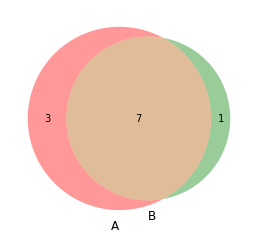

In [3]:
'''
Draw a Venn diagram for two sets
'''

from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from sympy import FiniteSet
def draw_venn(sets):
    venn2(subsets=sets)
    plt.show()

s1 = FiniteSet(1, 3, 5, 7, 9, 11, 13, 15, 17, 19)
s2 = FiniteSet(2, 3, 5, 7, 11, 13, 17, 19)
draw_venn([s1, s2])

<matplotlib_venn._common.VennDiagram instance at 0x7f0580268a28>

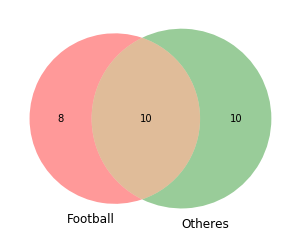

In [19]:
# Coding Challenge #1 - import CSV and visualise common answers in survey

import csv
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

def read_csv(filename):
    football = [ ]
    others = [ ] 
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            if row[1] == '1':
                football.append(row[0])
            if(row[2]) == '1':
                others.append(row[0])
    return football,others


survey_results = read_csv('students_survey.csv')
football_set = set(survey_results[0])
others_set = set(survey_results[1])
venn2(subsets=(football_set,others_set), set_labels=('Football', 'Otheres'))


In [9]:
# Expected value for a die roll
import random

e = 1*(1.0/6) + 2*(1.0/6) + 3*(1.0/6) + 4*(1.0/6) + 5*(1.0/6) + 6*(1.0/6)
print('Expected value: {0}'.format(e))

def trials(number_trials):
    counter = 0;
    for x in range(number_trials):
        result = float(random.randint(1,6))
        counter += result
        print(result)
    print('Trials: {0} Trial average {1}'.format(number_trials,float(counter/number_trials)))
    
        
trials(10)

Expected value: 3.5
5.0
6.0
5.0
3.0
1.0
3.0
2.0
6.0
5.0
4.0
Trials: 10 Trial average 4.0


In [4]:
from sympy import FiniteSet
import random

def find_prob(target_score, max_rolls):
    
    die_sides = FiniteSet(1,2,3,4,5,6)
    # Sample space
    s = die_sides**max_rolls
    #Find the event set
    if max_rolls > 1:
        success_rolls = []
        for elem in s:# For all subsets of s
            if sum(elem) >= target_score: # Sum and check if it gets us the target score or more
                success_rolls.append(elem)
    else:
        if target_score > 6:
            success_rolls = [] # We know there's a 0 change to score more than 6 in one go
        else:
            success_rolls = []
            for roll in die_sides:
                if roll >= target_score: # Check the score in the one go we have
                    success_rolls.append(roll)
    e = FiniteSet(*success_rolls)
    # Calculate the probability of success (reaching target score)
    return float(len(e))/float(len(s))

target_score = int(input('Enter the target score: '))
max_rolls = int(input('Enter the maximum of rolls allowed: '))
p = find_prob(target_score,max_rolls)
print('Probability: {0:.5f}'.format(p))

Enter the target score: 6
Enter the maximum of rolls allowed: 1
Probability: 0.16667


In [47]:
# Non-uniform random coin toss generator

def toss():
    # 0 -> heads, 1 -> tail
    if random.random() < 2.0/3.0:
        return 0
    else:
        return 1
    
headsCounter = 0
tailsCounter = 0 
for x in range(100):
    if (toss() == 1):
        tailsCounter += 1
    else :
        headsCounter += 1
    
print '{0} heads, {1} tails'.format(headsCounter,tailsCounter)
        

69 heads, 31 tails


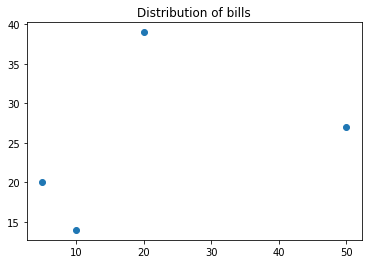

In [45]:
'''
Simulate a fictional ATM that dispenses bills
of various denominations with varying probability
'''

import matplotlib.pyplot as plt
import numpy as np

import random
from __future__ import division

dollar_bills = [5,10,20,50]
distribution = [0, 0, 0, 0]

def get_index(probability):
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    r = random.random()
    for index, sp in enumerate(sum_probability):
        if r <= sp:
            return index
    return len(probability) - 1



def dispense():
    probability = [1/6, 1/6, 1/3, 2/3]
    bill_index = get_index(probability)
    distribution[bill_index] += 1
    return dollar_bills[bill_index]


for i in range(100):
    bill_value = dispense()

plt.title('Distribution of bills')
plt.scatter(dollar_bills,distribution)
plt.show()

In [27]:
'''
Using code to verify the law of large 
'''

e = 1*(1/6) + 2*(1/6) + 3*(1/6) + 4*(1/6) + 5*(1/6) + 6*(1/6)
print('Expected value: {0}'.format(e))

# Simulate a random die roll
def roll_die():
    result = float(random.randint(1,6))
    return result

# Loop through the die as many times as requested
def repeat_roll(number_of_rolls):
    counter = 0
    for roll in range(number_of_rolls):
        counter += roll_die()
    return counter/number_of_rolls

print("Trials: {0} Trial average {1}".format(10,repeat_roll(10)))
print("Trials: {0} Trial average {1}".format(100,repeat_roll(100)))
print("Trials: {0} Trial average {1}".format(1000,repeat_roll(1000)))
print("Trials: {0} Trial average {1}".format(10000,repeat_roll(10000)))
print("Trials: {0} Trial average {1}".format(50000,repeat_roll(50000)))
print("Trials: {0} Trial average {1}".format(100000,repeat_roll(100000)))
print("Trials: {0} Trial average {1}".format(1000000,repeat_roll(1000000)))

Expected value: 3.5
Trials: 10 Trial average 3.6
Trials: 100 Trial average 3.52
Trials: 1000 Trial average 3.406
Trials: 10000 Trial average 3.5182
Trials: 50000 Trial average 3.51514
Trials: 100000 Trial average 3.49931
Trials: 1000000 Trial average 3.499648
